<a href="https://colab.research.google.com/github/Rtniewi/cwiertniewicz-DataScience/blob/main/HW4/problem2_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Katrina Cwiertniewicz
# Introduction to Data Science IS1
# 10/5/2025
# Project 4: Problem 2 Python
###The purpose of this assignment is to create contingency tables and answer questions using Python to analyze the datasets provided.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
nutritionDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/refs/heads/main/HW4/nutrition_subset.csv");

**Sort the data set by saturated_fat and produce a listing of the five food items highest in saturated fat. Comment on the validity of comparing food items of different sizes.**

In [5]:
nutritionDF.sort_values(by=['saturated_fat'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol
378,CHEESECAKE 1 CAKE,1110.0,119.9,2053
535,ICE CREAM; VANLLA; RICH 16% FT1/2 GAL,1188.0,118.3,703
458,YELLOWCAKE W/ CHOCFRSTNG;COMML1 CAKE,1108.0,92.0,609
581,CREME PIE 1 PIE,910.0,90.1,46
890,LARD 1 CUP,205.0,80.4,195


Comparing food items of different sizes won't correctly display if a food item is high or low in saturated fat as serving size and saturated fat per gram is not taken into consideration.

**Create a new variable, saturated_fat_per_gram by dividing the amount of saturated fat by the weight in grams. Sort the data set by saturated_fat_per_gram and produce a listing of the five food items highest in saturated fat per fram. Which food has the most saturated fat per gram?**

Salted Butter has the most saturated fat per gram.

In [13]:
nutritionDF['saturated_fat_per_gram'] = nutritionDF['saturated_fat']/nutritionDF['weight_in_grams']

nutritionDF.sort_values(by=['saturated_fat_per_gram'], ascending=False).iloc[0:5]

,food item,weight_in_grams,saturated_fat,cholesterol,saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,14.0,7.1,31,0.507143
909,BUTTER; UNSALTED 1 TBSP,14.0,7.1,31,0.507143
710,BUTTER; UNSALTED 1/2 CUP,113.0,57.1,247,0.505310
709,BUTTER; SALTED 1/2 CUP,113.0,57.1,247,0.505310
913,BUTTER; UNSALTED 1 PAT,5.0,2.5,11,0.500000


**Standardize(zero mean) the field saturated_fat_per gram, and produce a listing of all the food items that are outliers at the high end of the scale. How many food items are outliers at the low end of the scale? Create a density plot for saturated_fat_per_gram**

In [15]:
nutritionDF['scaled_saturated_fat_per_gram'] = stats.zscore(nutritionDF.saturated_fat_per_gram, nan_policy='omit')

nutritionDF['scaled_saturated_fat_per_gram'].describe()

,scaled_saturated_fat_per_gram
count,9.610000e+02
mean,6.654406e-17
std,1.000521e+00
min,-5.623352e-01
25%,-5.623352e-01
50%,-4.412993e-01
75%,1.539996e-01
max,7.110475e+00


<Axes: >

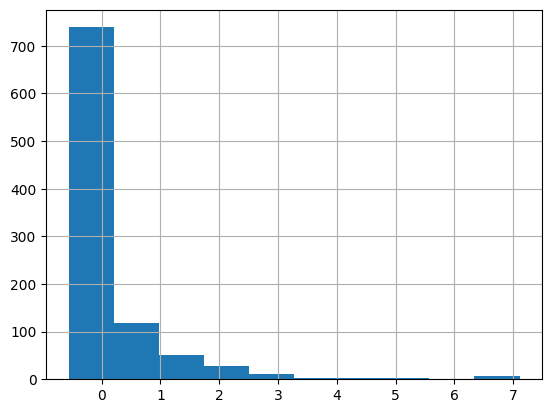

In [16]:
nutritionDF.scaled_saturated_fat_per_gram.hist()

In [53]:
# Determine the three sigma rule first for the high scaled_saturated_fat_per_gram attribute

max_outliers_saturated_fat = nutritionDF.query('scaled_saturated_fat_per_gram > 3')

max_outliers_saturated_fat_sort = max_outliers_saturated_fat.sort_values(by='scaled_saturated_fat_per_gram', ascending=False)

# Number of Outliers
print("There are", len(max_outliers_saturated_fat), "outliers \n\n")

# Max Outliers
display(max_outliers_saturated_fat_sort[["food item", "saturated_fat_per_gram", "scaled_saturated_fat_per_gram"]])

There are 15 outliers 




,food item,saturated_fat_per_gram,scaled_saturated_fat_per_gram
908,BUTTER; SALTED 1 TBSP,0.507143,7.110475
909,BUTTER; UNSALTED 1 TBSP,0.507143,7.110475
709,BUTTER; SALTED 1/2 CUP,0.505310,7.082741
710,BUTTER; UNSALTED 1/2 CUP,0.505310,7.082741
912,BUTTER; SALTED 1 PAT,0.500000,7.002408
913,BUTTER; UNSALTED 1 PAT,0.500000,7.002408
899,LARD 1 TBSP,0.392308,5.373078
890,LARD 1 CUP,0.392195,5.371375
920,IMITATION CREAMERS; POWDERED 1 TSP,0.350000,4.732985
210,CHOCOLATE; BITTER OT BAKING 1 OZ,0.317460,4.240676


In [50]:
# Determine the three sigma rule first for the low scaled_saturated_fat_per_gram attribute

low_outliers_saturated_fat = nutritionDF.query('scaled_saturated_fat_per_gram < -3')

low_outliers_saturated_fat_sort = low_outliers_saturated_fat.sort_values(by='scaled_saturated_fat_per_gram', ascending=False)

# Number of Outliers
print("There are", len(low_outliers_saturated_fat), "outliers \n\n")

# Max Outliers
display(low_outliers_saturated_fat_sort[["food item", "saturated_fat_per_gram", "scaled_saturated_fat_per_gram"]])

There are 0 outliers 




,food item,saturated_fat_per_gram,scaled_saturated_fat_per_gram


There were no outliers on the other side with z-scores lower than -3.

**Density Plot for Saturated Fat Per Gram**

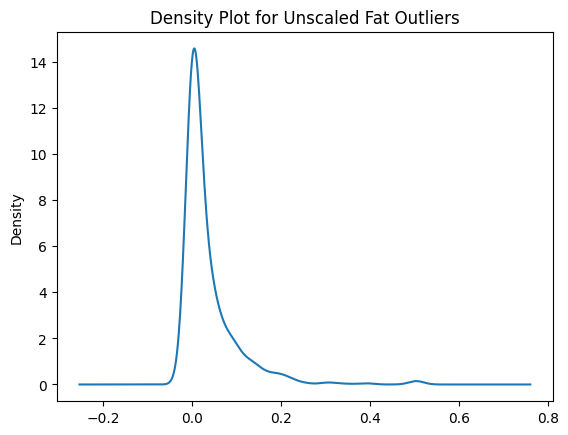

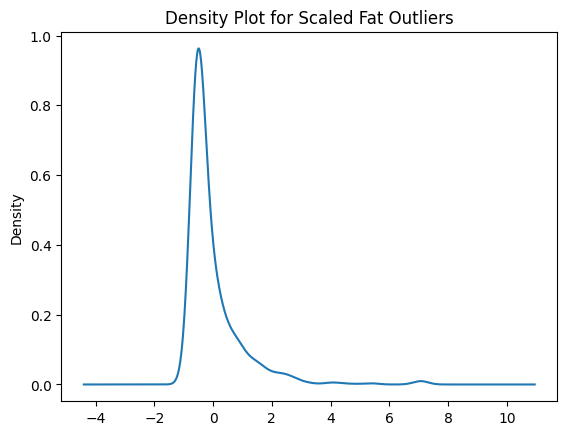

In [42]:
# Kernel Density Plot
nutritionDF['saturated_fat_per_gram'].plot.density()
plt.title('Density Plot for Unscaled Fat Outliers')
plt.show()


# Kernel Density Plot
nutritionDF['scaled_saturated_fat_per_gram'].plot.density()
plt.title('Density Plot for Scaled Fat Outliers')
plt.show()



Are there any missing values? If so, impute as necessary and explain your approach.

In [37]:
nutritionDF.isnull().values.any()

np.False_

Missing values were checked and there were no missing values.

**Standardize (zero mean) the numeric variables, and determine if there are any outliers.**

**Outliers for Weight in Grams**

In [46]:
# Standardized Weight in Grams
nutritionDF['scaled_weight_in_grams'] = stats.zscore(nutritionDF.weight_in_grams, nan_policy='omit')

#Outliers
weight_in_grams_outliers = nutritionDF.query('scaled_weight_in_grams > 3 | scaled_weight_in_grams < -3')['scaled_weight_in_grams']

print("\n")
# Number of Outliers
print("There are", len(weight_in_grams_outliers), "outliers \n\n")


print("The scaled weight in grams values that are outliers: \n\n")
display(weight_in_grams_outliers)





There are 22 outliers 


The scaled weight in grams values that are outliers: 




,scaled_weight_in_grams
361,4.326016
376,6.891171
378,5.463557
386,3.842561
406,3.569551
410,5.446494
422,7.886520
423,5.452182
430,4.326016
433,5.110919


**Outliers for Saturated Fat**

In [54]:
# Standardized Saturated Fat
nutritionDF['scaled_saturated_fat'] = stats.zscore(nutritionDF.saturated_fat, nan_policy='omit')

#Outliers
saturated_fat_outliers = nutritionDF.query('scaled_saturated_fat > 3 | scaled_saturated_fat < -3')['scaled_saturated_fat']

print("\n")
# Number of Outliers
print("There are", len(saturated_fat_outliers), "outliers \n\n")


print("The scaled saturated fat values that are outliers: \n\n")
display(saturated_fat_outliers)



There are 20 outliers 


The scaled saturated fat values that are outliers: 




,scaled_saturated_fat
376,4.061209
378,10.793826
384,4.470940
410,4.806174
422,5.774628
423,4.079833
430,3.185876
458,8.195762
466,6.268167
479,3.502486


**Outliers for Cholesterol**

In [55]:
# Standardized Cholesterol
nutritionDF['scaled_cholesterol'] = stats.zscore(nutritionDF.cholesterol, nan_policy='omit')

#Outliers
cholesterol_outliers = nutritionDF.query('scaled_cholesterol > 3 | scaled_cholesterol < -3')['scaled_cholesterol']

print("\n")
# Number of Outliers
print("There are", len(cholesterol_outliers), "outliers \n\n")


print("The scaled saturated fat values that are outliers: \n\n")
display(cholesterol_outliers)



There are 17 outliers 


The scaled saturated fat values that are outliers: 




,scaled_cholesterol
45,3.148058
351,4.357418
361,8.152305
376,5.066353
378,16.851355
384,8.902942
386,4.474184
406,4.332397
410,4.716056
422,9.595197


# **Findings**

After calculating saturated fat per gram, there is a major discrepancy between data values. Without a designated scale to determine by weight how much each nutritional value makes up of a food item, the items are being compared disproportionally. This may be why we see about 20 outliers for each nutritional point, as higher values seem like outliers but may not be being compared correctly by weight. To fix this, each nutritional value should be calculated by gram to remove this calculation issue.
